In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline


# sns.set_style('darkgrid')
# matplotlib.rcParams['font.size'] = 14
# matplotlib.rcParams['figure.figsize'] = (10, 6)
# matplotlib.rcParams['figure.facecolor'] = '#000000'

In [2]:
raw_df = pd.read_csv('dataset/weatherAUS.csv')

raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [3]:
raw_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)
data = raw_df
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

#### Exploratory analysis & visualization

In [4]:
print(data.columns)

data.head()

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [5]:
unique_locations = data.Location.nunique()
print(f'Unique locations: {unique_locations}')
fig = px.histogram(
    data,
    x='Location',
    title='Location vs Rainy days',
    color='RainToday'
)
fig.update_layout(bargap=0.3)

Unique locations: 49


Temp3pm

In [6]:
px.histogram(
    data,
    x='Temp3pm',
    color='RainTomorrow',
    title='Temperature at 3pm vs Rain tomorrow'
)

In [7]:
px.histogram(
    data,
    x='RainTomorrow',
    color='RainToday',
    title='Rain Tomorrow vs Rain today'
)

In [8]:
px.scatter(
    data.sample(2000),
    x='MinTemp',
    y='MaxTemp',
    opacity=0.7,
    color='RainToday',
    title='Min Temp. vs Max Temp'
)

In [9]:
px.strip(
    data.sample(2000),
    x='Temp3pm',
    y='Humidity3pm',
    color='RainTomorrow'
)

Get a portion of the dataset

In [10]:
use_sample = False
sample_fraction = 0.1
if use_sample:
    data = data.sample(frac=sample_fraction).copy()

#### Training, Validation & Test set

In [11]:
from sklearn.model_selection import train_test_split

train_val_df, test_df = train_test_split(data, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(84471, 23)
(28158, 23)
(28158, 23)


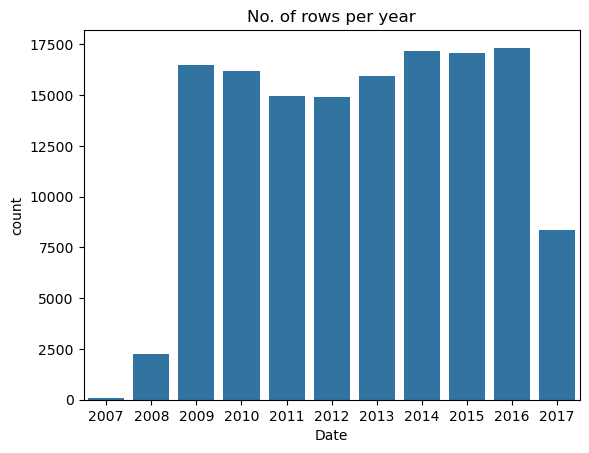

In [12]:
plt.title('No. of rows per year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year)
plt.show()

In [21]:
year = pd.to_datetime(data.Date).dt.year

train_df = data[year < 2015]
val_df = data[year == 2015]
test_df = data[year > 2015]

print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(97988, 23)
(17089, 23)
(25710, 23)
